# Unsupervised Learning
Unsupervised learning is a type of machine learning where the model is trained on data without labeled outputs.

***Key Characteristics:***
- **Unlabeled Data:** Works with datasets that do not contain explicit input-output pairs.
- **Learning Objective:** Discover patterns, structure, or relationships in the data.
- **Output Types:**
    - *Clustering:* Group similar data points (e.g., customer segmentation).
    - *Dimensionality Reduction:* Simplify data while retaining key information (e.g., PCA).

***Common Algorithms:***
- *Clustering:* K-Means, Hierarchical Clustering, DBSCAN
- *Dimensionality Reduction:* Principal Component Analysis (PCA), t-SNE, Autoencoders

***Applications:***
- Customer Segmentation
- Anomaly Detection
- Data Visualization
- Market Basket Analysis
- Document Grouping

## Clustering Digits
We will use [Digits](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_digits.html) dataset from sklearn.
Which have 1797 image samples each with 64 features (8x8 pixels).

In [1]:
# Load digits dataset from sklearn
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
print(X.shape)

(1797, 64)


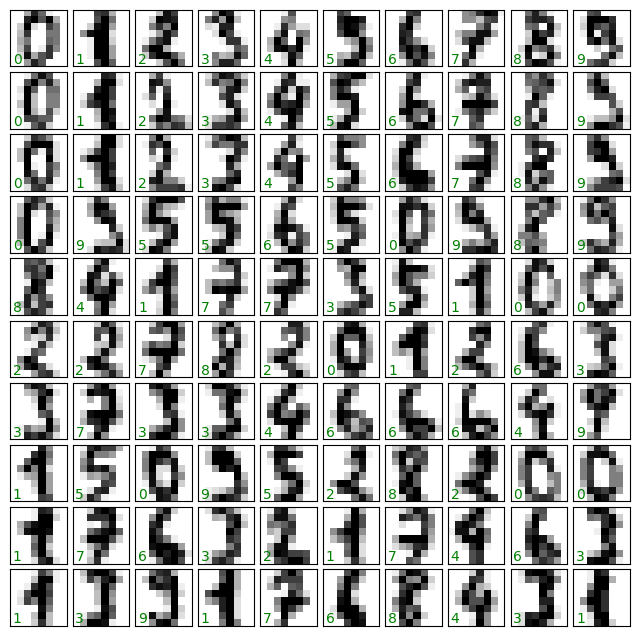

In [2]:
# Plot the first 100 digits
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    axi.text(0.05, 0.05, str(digits.target[i]),
                transform=axi.transAxes, color='green')
plt.show()

## PCA to reduce the dimensionality
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form while retaining most of the variance in the data.

**Mathematical Representation:**
PCA identifies the directions (principal components) along which the variance of the data is maximized. The data is then projected onto these principal components.

**Advantages:**
- Reduces the complexity of the data.
- Helps in visualizing high-dimensional data.
- Removes noise and redundant features.

**Disadvantages:**
- Can be sensitive to the scaling of the data.
- May lose some information in the process.
- Assumes linear relationships between variables.


In [12]:
# Apply PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(f'Original shape: {X.shape}, Projected shape: {Xproj.shape}')

print(f'2 Components explain {pca.explained_variance_ratio_.sum() * 100:.2f}% of the variance in the data')

Original shape: (1797, 64), Projected shape: (1797, 2)
2 Components explain 28.51% of the variance in the data


<ipython-input-13-ad809890c0d6>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


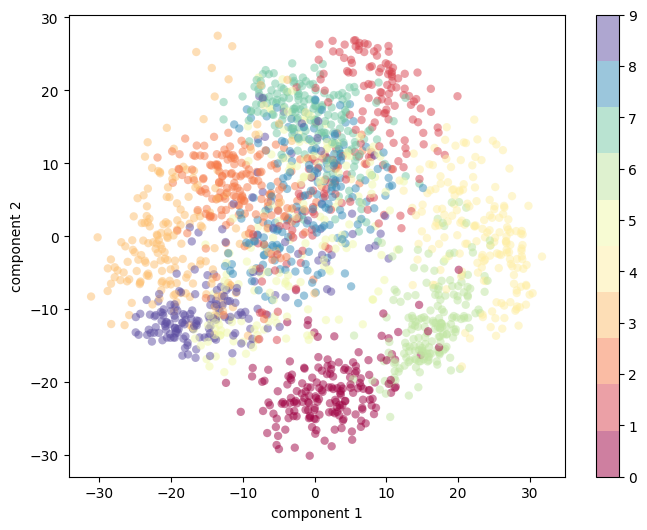

In [13]:
# Plot the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

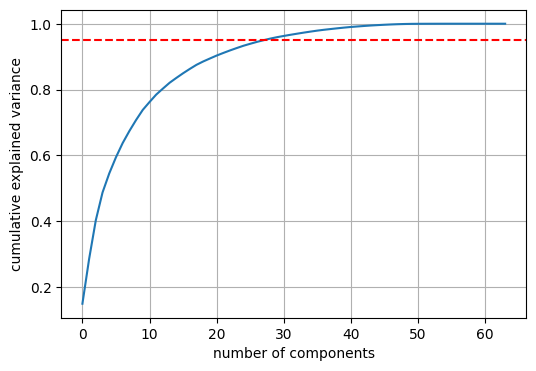

In [7]:
import numpy as np

# Plot the explained variance ratio
plt.figure(figsize=(6, 4))
pca_ = PCA().fit(X)
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

This means that 95% of the variance in the data is explained by 28 components, thus if we reduce the data too much we lose a lot of information.

We reduce the data to 2 or 3 dimensions for visualization purposes, but for machine learning we should use a higher number of components.

## KMeans clustering
KMeans is a popular clustering algorithm used to partition a dataset into K distinct, non-overlapping subsets or clusters.

**Algorithm Steps:**
1. Initialize K centroids randomly.
2. Assign each data point to the nearest centroid.
3. Recalculate the centroids as the mean of all points assigned to each centroid.
4. Repeat steps 2 and 3 until convergence (i.e., centroids no longer change).

**Mathematical Representation:**
The objective is to minimize the within-cluster sum of squares (WCSS):
$$\text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2$$
where \(C_i\) is the ith cluster and \(\mu_i\) is the centroid of the ith cluster.

**Advantages:**
- Simple and easy to implement.
- Efficient for large datasets.
- Works well when clusters are spherical and well-separated.

**Disadvantages:**
- Requires the number of clusters (K) to be specified in advance.
- Sensitive to initial placement of centroids.
- Not suitable for clusters with non-convex shapes or varying densities.


In [ ]:
# Apply KMeans clustering to the PCA-reduced data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(Xproj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Predict the cluster labels
y_kmeans = kmeans.predict(Xproj)
print(y_kmeans.shape)

(1797,)


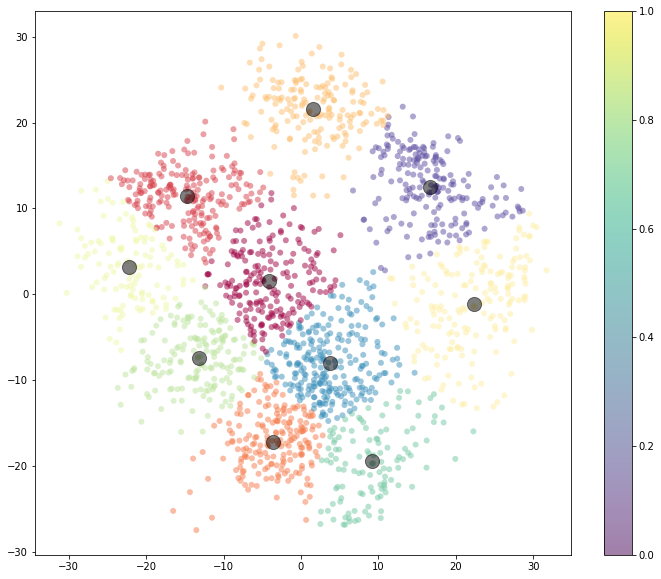

In [ ]:
# Plot the KMeans clustering results
plt.figure(figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y_kmeans, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.colorbar()
plt.show()

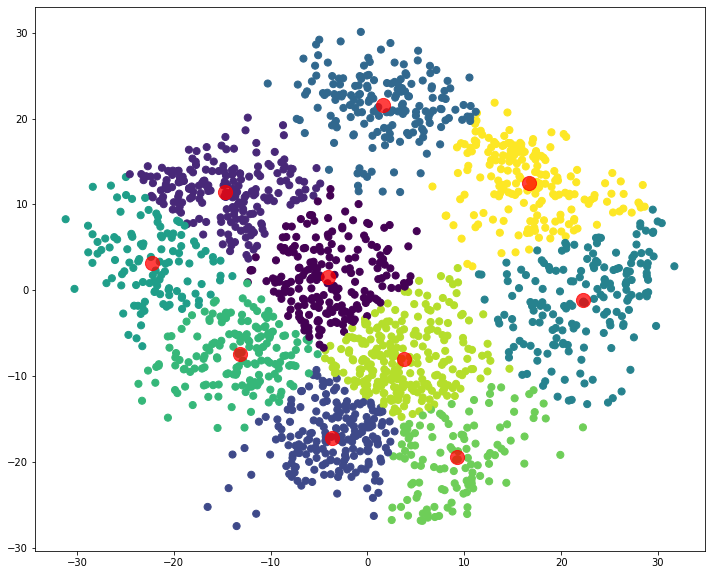

In [ ]:
# Plot the KMeans clustering results, with the redius of the circles representing the cluster size
plt.figure(figsize=(8, 6))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

### Now compare the predictions
But in a real world senario where you're gonna use Unsupervised Learning algorithms, you will not get the actual labels, $y$.

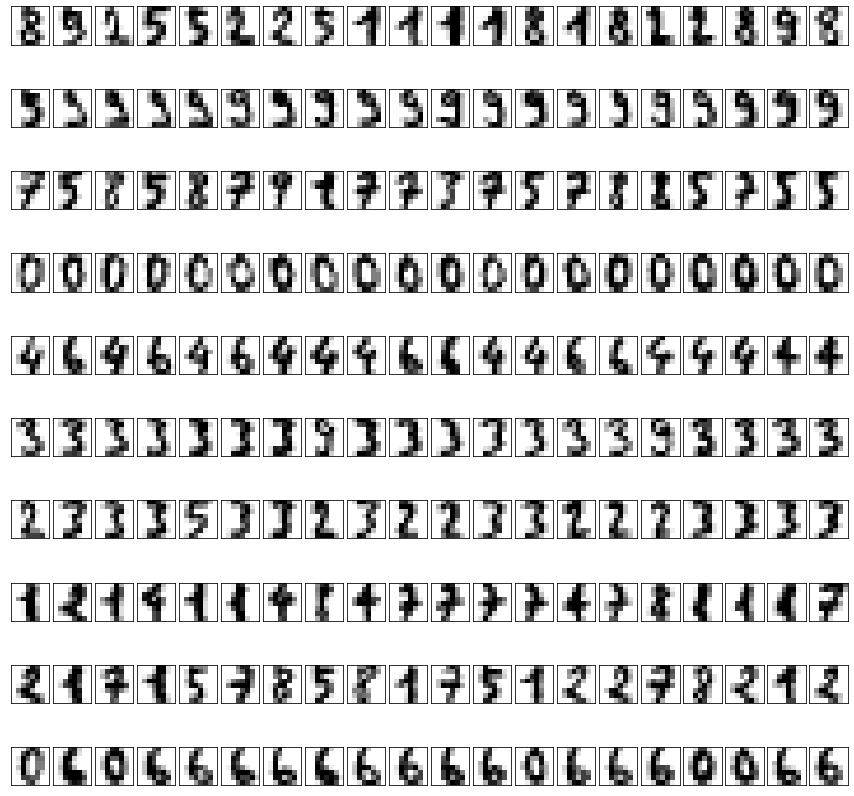

In [ ]:
# Let's look at 20 samples from each cluster, print the cluster label and the digit image
n_clusters = 10
fig, ax = plt.subplots(n_clusters, 20, figsize=(12, 12),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(n_clusters):
    for j in range(20):
        ax[i, j].imshow(X[y_kmeans == i][j].reshape(8, 8), cmap='binary', interpolation='nearest')
plt.show()

From the above image we can see that, probably

*cluster 0:* digit 1, *cluster 1:* digit 9, *cluster 2:* digit 5, *cluster 3:* digit 0, *cluster 4:* digit 4, *cluster 5:* digit 3, *cluster 6:* digit 2, *cluster 7:* digit 7, *cluster 8:* digit 8, *cluster 9:* digit 6

In [ ]:
# Let's map the cluster labels to the digit labels
mapping = np.array([1, 9, 5, 0, 4, 3, 2, 7, 8, 6])
y_kmeans_mapped = mapping[y_kmeans]

In [ ]:
# Get the actual labels of the data
y = digits.target
print(y.shape)

# Compare the predicted labels with the actual labels
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_kmeans_mapped)
print(f'Accuracy: {accuracy}')

(1797,)
Accuracy: 0.5180856983861992


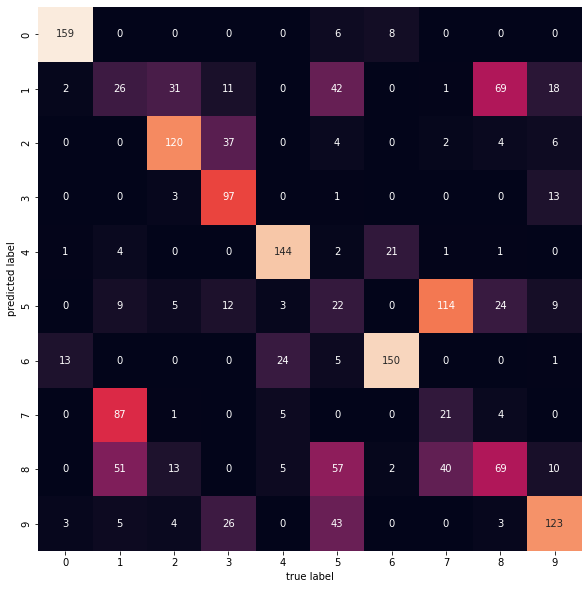

In [ ]:
# Plot the confusion matrix with the actual and predicted labels
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))
mat = confusion_matrix(y, y_kmeans_mapped)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Home Work
- Use more clusters, and set the labels by inspecting the actual image from each clusters.
    - Does the accuracy increase?
- Apply the KMeans Clustering without applying the PCA first.
    - Does it lead to better accuracy? Why?